#  Naïve Bayesian Classifier in Python without Sklearn

Import basic Modules or libraries

In [ ]:
import csv
import random
import math
import pandas as pd

# Imported these libraries for visualization of results
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

Function to load the dataset

In [128]:
def loadCsv(filename):
    #dataset=pd.read_csv(filename,header=None)
    lines = csv.reader(open(filename, "rt"))
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

Fuction to split the data By outcome class (Group 0's and 1's)

In [136]:
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    #print(separated)
    return separated

Function to calculate the mean of the numbers

In [135]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

Function to calculate the standard deviation of the numbers

In [134]:
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

Function to Summarize details of the dataset

In [133]:
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

Function to summarize the information like mean and standard deviation by class

In [47]:
def summarizeByClass(dataset):
    #print(dataset)    
    separated = separateByClass(dataset)
    #print(separated)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

Function to calculate the Probability

In [132]:
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

Fuction to calculate the probability by Class

In [130]:
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities


Function to predict from the Probability

In [131]:
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

Function to getPredictions of test data

In [126]:
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

Function to get Accuracy from the test data

In [125]:
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            #print(len(testSet))
            #y_test.append(testSet[i][-1])
            correct += 1
    return (correct/float(len(testSet))) * 100.0

Main Part

In [ ]:
if name==__main__:
    filename = 'C:/Users/saumy/Desktop/pattern/Project1Data/data/train.csv'
    #filename ="C:/Users/018807852SA/Downloads/Project1Data/data/train.csv"
    dataset = loadCsv(filename)
    testSet="C:/Users/saumy/Desktop/pattern/Project1Data/data/train.csv"
    #testSet= loadCsv('C:/Users/018807852SA/Downloads/Project1Data/data/test.csv')
    #test_set=pd.read_csv("C:/Users/018807852SA/Downloads/Project1Data/data/test.csv",header=None)
    summaries = summarizeByClass(dataset)
    #test_model
    predictions = getPredictions(summaries, testSet)

## Accuracy

In [122]:
accuracy = getAccuracy(testSet, predictions)
#print(testSet[i][-1]for i in range(len(testSet)))
print('Accuracy: {} %'.format(accuracy))

Accuracy: 74.01574803149606 %


## Confusion Matrix

Text(0.5,1,'Confusion Matrix')

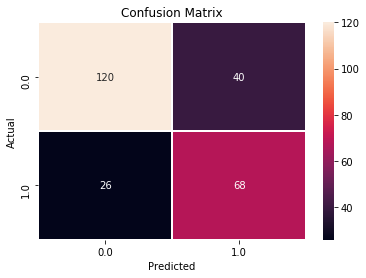

In [118]:
data={'predicted':list(predictions),'Actual':list(test_set[8])}
df=pd.DataFrame(data,columns=['Actual','predicted'])
confusion_matrix = pd.crosstab(df['Actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'])
#print(confusion_matrix)
ax = plt.axes()
sn.heatmap(confusion_matrix,fmt="d", annot=True,linewidths=.5,ax=ax)
ax.set_title("Confusion Matrix")
#ax.annotate("ABC")

## Countin each Class of Test data

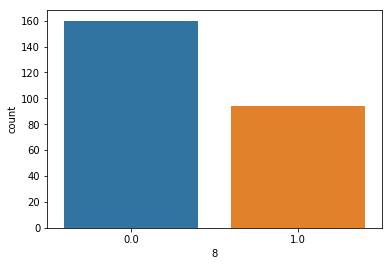

In [94]:
sn.countplot(x=test_set[8])

## Count in each class of Prediction

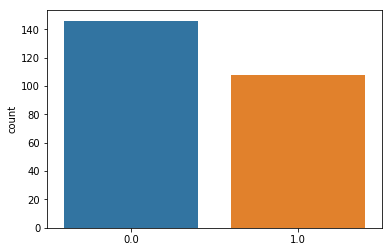

In [92]:
sn.countplot(x=predictions)

## Accuracy, Error, Sensitivity and Specificity

In [59]:
numbers=metrics.confusion_matrix(list(test_set[8]),predictions)

In [60]:
TN=numbers[0][0]
FP=numbers[0][1]
FN=numbers[1][0]
TP=numbers[1][1]

In [61]:
Accuracy = (TP + TN) / (TP + FP + TN +FN)
Accuracy

0.7401574803149606

In [62]:
Error = (FP + FN) / (TP + FP + TN +FN)
Error

0.25984251968503935

In [63]:
Sensitivity = TP / (FN + TP)
Sensitivity

0.723404255319149

In [64]:
Specificity = TN / (TN/FP)
Specificity

40.0

## Plotting ROC Curve

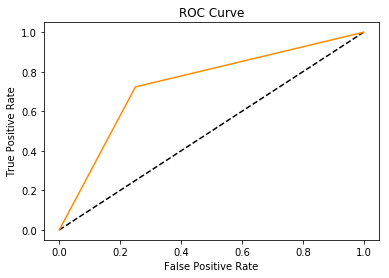

In [115]:
fpr, tpr, thresholds = roc_curve(test_set[8], predictions)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color='darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()